In [1]:
class Object(object):
    pass
opt = Object()
opt.t_stride = 5
opt.prev_warp = False
opt.double_size = False
opt.loss_on_raw = False
opt.batch_norm = False
opt.search_range = 0
opt.no_cuda = False
opt.model = 'vinet_final'
opt.crop_size = 512
opt.pretrain_path = None
opt.no_lstm = True

In [2]:
from model import generate_model

model, _ = generate_model(opt)

In [3]:
import torch
model.load_state_dict(torch.load('model_weights_240513_0145.pt'))

<All keys matched successfully>

In [5]:
import os

pwd = os.getcwd()
pwd
from VIDataloader.VIDataloader import get_dataloader
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((512, 512)), transforms.ToTensor(),
])
image_dir = os.path.join(pwd, "train_images", "images")
mask_dir = os.path.join(pwd, "train_images", "masks")
batch_size = 2

dataloader = get_dataloader(image_dir, mask_dir, batch_size, transform)
type(dataloader), len(dataloader)

(torch.utils.data.dataloader.DataLoader, 2720)

In [6]:
image, mask = next(iter(dataloader))
inverse_masks = 1. - mask
masked_image = image.clone() * inverse_masks
prev_mask = mask[:,:,3,:,:]
prev_ones = torch.ones(prev_mask.size())
prev_feed = torch.cat([masked_image[:,:,4,:,:], prev_ones, prev_ones*prev_mask], dim=1)
model.eval()
frame = model(masked_image, mask, None, prev_feed)

c:\Users\Demonstration\anaconda3\envs\yolov8_tracking\lib\site-packages\torch\nn\functional.py:4296: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
c:\Users\Demonstration\anaconda3\envs\yolov8_tracking\lib\site-packages\torch\nn\functional.py:3769: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


In [7]:
frame = frame[0]

In [8]:
frame.shape

torch.Size([2, 3, 1, 512, 512])

In [9]:
output = frame[0]
import matplotlib.pyplot as plt

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


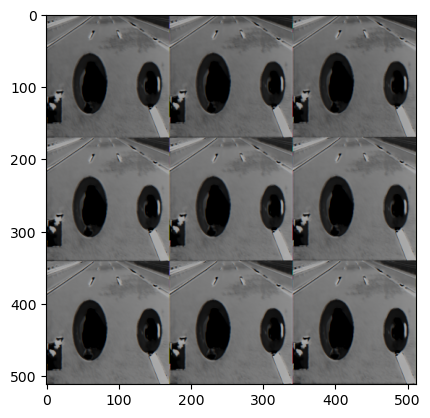

In [10]:
output = output.squeeze(1).reshape(512,512,3).cpu().detach().numpy()
plt.imshow(output)

In [11]:
sample = image[0]

In [12]:
sample = image[0,:,4,:,:]
sample.shape

torch.Size([3, 512, 512])

In [13]:
sample = sample.reshape(512,512,3).cpu().detach().numpy()

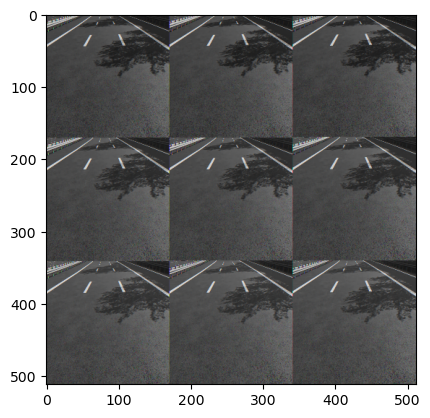

In [14]:
plt.imshow(sample)